# Imports

In [1]:
# import numpy as np
# import scipy.signal as sig
# from matplotlib import pyplot as plt 
# import random
# import librosa
# import snntorch as snn
# import torch
# from snntorch import spikegen

from bsc_package import *

Spike trains

In [2]:
# Takes in pixel and returns spike train
def rateCodingRandPix2Spike(pVal,tu):
    spikeTrain = [ int(1) if pVal > random.random() else int(-1) if -1*pVal > random.random()  else int(0) for i in range(tu)]
    return np.asarray(spikeTrain)

# # Normalizes 2d image between 0 and 1
# def norm2D(image):
#     return (image - np.min(image)) / (np.max(image) - np.min(image))

def rateCodingRand2D(signal):
    # 1. Normalize the input image
    image = signal/np.max(signal)
    # 2. Set a firing rate, T
    T = 1  # Set to spike train interval 100ms
    # 3. Using T obtain time axis 
    dt = 1  # (T = 100ms -> dt = 1000ms/100 = 1ms)
    bins = int(T / dt)  # time axis length of 100 units
    # random.seed(9)
    # 4. For each normalized pixel value in , pVal, in image and for each 
    # time unit T, generate a random number, r from range (0,1). 
    # If pVal > r then store a spike at that time instant otherwise 0.
    spikeTrainOut = 0
    for x in image:
        spikeTrain = rateCodingRandPix2Spike(x,bins)
        # print('Normal val',x,'fired on',(len([i for i in spikeTrain if i == 1]))/bins,'%')
        spikeTrainOut = np.hstack((spikeTrainOut, spikeTrain))

    return spikeTrainOut

def generate_multi_sine_wave(duration, frequencies, amplitudes, sampling_rate):
    t = np.arange(0, duration, 1/sampling_rate)
    signal = np.sum([amplitude * np.sin(2 * np.pi * frequency * t) for frequency, amplitude in zip(frequencies, amplitudes)], axis=0)
    return t, signal

# LIF CLASS

### Simple Method

In [3]:
# ## Simple Method

# def leaky_integrate_neuron(U, time_step=1e-3, I=0, R=5e7, C=1e-10):
#   tau = R*C
#   U = U + (time_step/tau)*(-U + I*R)
#   return U

# num_steps = 100
# U = 0
# U_trace = []  # keeps a record of U for plotting

# for step in range(num_steps):
#   U_trace.append(U)
#   U = leaky_integrate_neuron(U)  # solve next step of U

# # plt.plot(range(num_steps), U_trace)

### Simple Method 2 - from snnTorch

THE WAY TO GO

In [4]:
# class LiF():

#     def __init__(self, w=0.4, beta=0.819, threshold=1) -> None:
#         self.w = w
#         self.beta = beta
#         self.threshold = threshold
        
#         self.mem = 0


#     def run_step(self, input_current):
#         spk = (self.mem > self.threshold) # if membrane exceeds threshold, spk=1, else, 0
#         self.mem = self.beta * self.mem + self.w*input_current - spk*self.threshold
#         return spk

In [5]:
# def leaky_integrate_and_fire(mem, x, w, beta, threshold=1):
#   spk = (mem > threshold) # if membrane exceeds threshold, spk=1, else, 0
#   mem = beta * mem + w*x - spk*threshold
#   return spk, mem

# num_steps = 200

# # initialize inputs/outputs + small step current input
# # x = np.concatenate((np.zeros(10), np.ones(190)*0.5))

# # mem = torch.zeros(1)
# # spk_out = torch.zeros(1)

# # Parameters
# duration = 1  # seconds
# frequencies = [2500, 500, 15000]  # Hz
# amplitudes = [1,1,1]
# sampling_rate = 44100  # Hz

# time, signal = generate_multi_sine_wave(duration, frequencies, amplitudes, sampling_rate)

# signal = signal/np.max(signal)


# x = rateCodingRand2D(signal)


# mem = np.zeros(1)
# spk_out = np.zeros(1)
# mem_rec = []
# spk_rec = []

# # neuron parameters
# w = 0.4 # weighted input parameter
# beta = 0.819  # decay rate

# # neuron simulation
# for step in range(np.size(time)):
#   spk, mem = leaky_integrate_and_fire(mem, x[step], w=w, beta=beta, threshold=0.5)
#   mem_rec.append(mem)
#   spk_rec.append(spk)

# # convert lists to tensors
# # mem_rec = torch.stack(mem_rec)
# # spk_rec = torch.stack(spk_rec)
  
# interval = 100

# plt.plot(time[:interval], signal[:interval], color = "y")
# plt.stem(time[:interval], x[:interval])
# plt.show()

# plt.plot(time[:interval], mem_rec[:interval], color="r")
# plt.stem(time[:interval], spk_rec[:interval]);
# plt.show();



### Method with snnTorch

https://snntorch.readthedocs.io/en/latest/tutorials/tutorial_2.html

The Lapicque model is the most basic LIF model in snnTorch

In [6]:
# import snntorch.spikeplot as splt

# time_step = 1e-3
# R = 5
# C = 1e-3

# num_steps = 100

# spk_in = spikegen.rate_conv(torch.ones((num_steps)) * 0.4)

# # leaky integrate and fire neuron, tau=5e-3
# lif3 = snn.Lapicque(R=5.1, C=5e-3, time_step=1e-3, threshold=0.5)

# # Initialize inputs and outputs
# mem = torch.ones(1) * 0.5
# spk_out = torch.zeros(1)
# mem_rec = [mem]
# spk_rec = [spk_out]

# # Neuron simulation
# for step in range(num_steps):

#   spk_out, mem = lif3(spk_in[step], mem)

#   spk_out = torch.Tensor([spk_out])
#   mem = torch.Tensor([mem])

#   spk_rec.append(spk_out)
#   mem_rec.append(mem)


# # convert lists to tensors
# mem_rec = torch.stack(mem_rec)
# spk_rec = torch.stack(spk_rec)

# # plt.plot(range(num_steps+1), spk_rec)

# # fig, ax = plt.subplots(facecolor='w', figsize=(12, 7))

# # splt.spike_count(spk_rec,fig, ax, ["Spikes"])


Not really working

# TDE CLASS

In [7]:
# class TDE():

#     def __init__(self, decay_params=[1, 0.5, 20], LIF_params=[0.4, 0.819, 1]) -> None:

#         """
#         Parameters:
#         decay_params (list): List consisting of decay parameters - initial value , decay factor , num of samples
#         LIF_params (list): List containing parameters for the LIF - weighted input parameter , decay value , threshold value
#         """


#                                 # Initializes the exponential function to grab gain values from
#         self.exp = np.append(self.exponential_decay(decay_params[0], decay_params[1], decay_params[2]), 0)

#         self.gain = 0           # The current gain of the TDE
#         self.gain_index = np.size(self.exp)     # The index of the current gain, to be used with the exponential decay function

#         self.LIF = LiF(LIF_params[0], LIF_params[1], LIF_params[2])

#         self.send_current = True


#     def exponential_decay(self, a, b, N):
#         # a, b: exponential decay parameter
#         # N: number of samples 
#         return a * (1-b) ** np.arange(N)

#     def calculate(self, fac, trig):

#         if fac == 1:
#             self.send_current = False
#             self.gain_index = 0
#             self.gain = self.exp[self.gain_index]

#         if self.gain != 0 and trig == 1:
#             self.send_current = True

#         if self.send_current:
#             spk = self.LIF.run_step(self.gain)
        
#         else: spk = self.LIF.run_step(0.0)

#         if self.gain_index < np.size(self.exp):
#             self.gain = self.exp[self.gain_index]
#             self.gain_index += 1
            

#         return spk
    
#     def return_lif_mem(self):
#         return self.LIF.mem
    
#     def return_lif_gain(self):
#         return self.gain
            


TDE Test

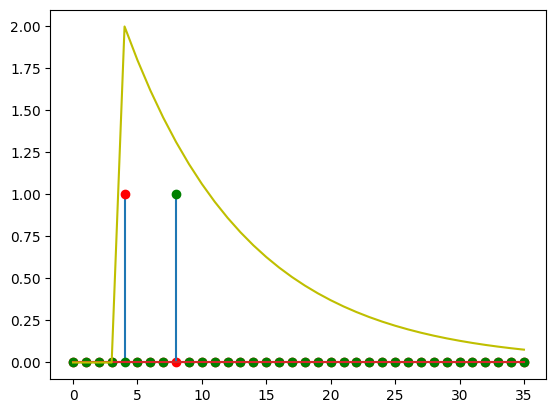

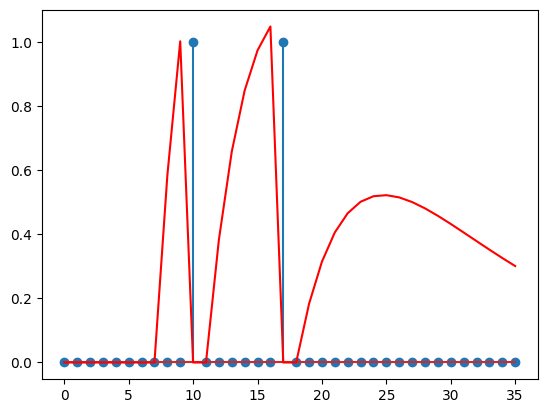

In [8]:
facs = [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
trigs =[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
spk_out = []
mem_rec = []
gain_rec = []

tde1 = TDE(decay_params=[2, 0.1, 200])

for step in range(np.size(facs)):

    tde1.calculate(facs[step], trigs[step])

    spk_out = np.append(spk_out, tde1.output)
    mem_rec = np.append(mem_rec, tde1.return_lif_mem())
    gain_rec = np.append(gain_rec, tde1.return_lif_gain())

# print(facs)
# print(trigs)
# print(spk_out)
# print(mem_rec)

plt.stem(range(np.size(facs)), facs, markerfmt='ro')
plt.stem(range(np.size(facs)), trigs, markerfmt='go')
plt.plot(range(np.size(facs)), gain_rec, color = "y")
plt.show()

plt.stem(range(np.size(facs)), spk_out)
plt.plot(range(np.size(facs)), mem_rec, color='r')
plt.show()

Good conclusion so far. The TDE is so far acting as I would like. Should tweak code to be more scalable

## Test with TDE module and various time differences

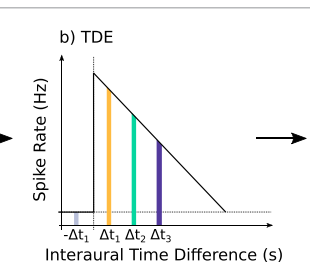

The spike rate should be linearly inversely proportional to the time difference observed by a single TDE module

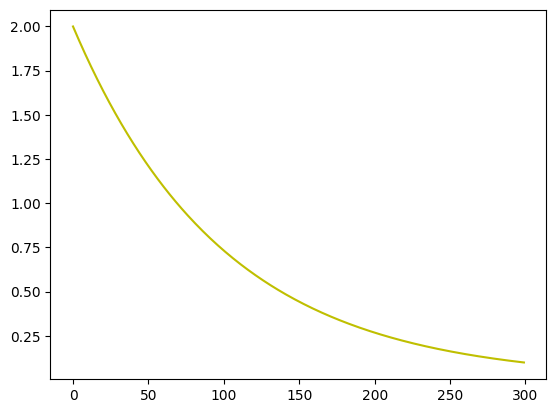

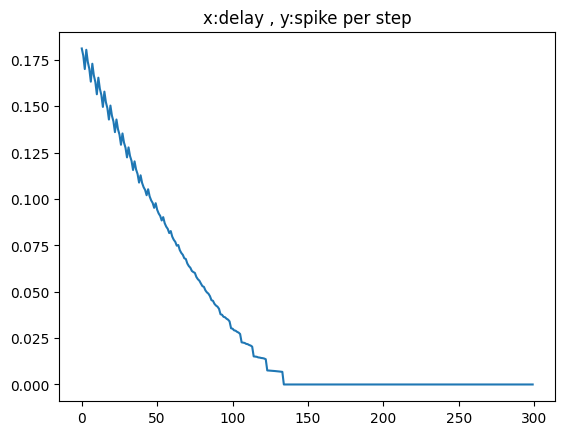

In [9]:
facs = np.zeros(300)
start_idx = 0
facs[start_idx] = 1
test_range = 300

tde1 = TDE(decay_params=[2, 0.01, test_range])



spike_sums = []

for i in range(test_range):

    spk_out = []
    mem_rec = []
    gain_rec = []

    trigs = np.zeros(np.size(facs))
    
    trigs[start_idx + i] = 1

    for step in range(np.size(facs)):
        tde1.calculate(facs[step], trigs[step])

        spk_out = np.append(spk_out, tde1.output)
        mem_rec = np.append(mem_rec, tde1.return_lif_mem())
        gain_rec = np.append(gain_rec, tde1.return_lif_gain())


    if np.sum(spk_out):

        # print(np.max(np.nonzero(spk_out)) - np.min(np.nonzero(spk_out)))

        spike_sums.append(np.sum(spk_out) / (np.max(np.nonzero(spk_out)) - start_idx))

    else: spike_sums.append(0)


    # if i in range(90,100):
    #     # print(np.sum(spk_out))
    #     plt.stem(range(np.size(facs)), spk_out)
    #     plt.plot(range(np.size(facs)), mem_rec, color='r')
    #     plt.show()

plt.plot(range(np.size(facs)), gain_rec, color = "y")
plt.show()

plt.plot(range(test_range), spike_sums)
plt.title("x:delay , y:spike per step")
plt.show()


    
    

The spike rate is here calculated by taking the number of spikes and dividing by the number of steps from the facilitator spike to the last generated spike.  
Is this the best way to find the spiking rate?

Tweaking the initial value of the decay parameter seems to be the defining factor in generating spikes throughout the decay.  
The lower the decay parameter, the more linear the relationship becomes (seemingly) 

## Similar test with IF

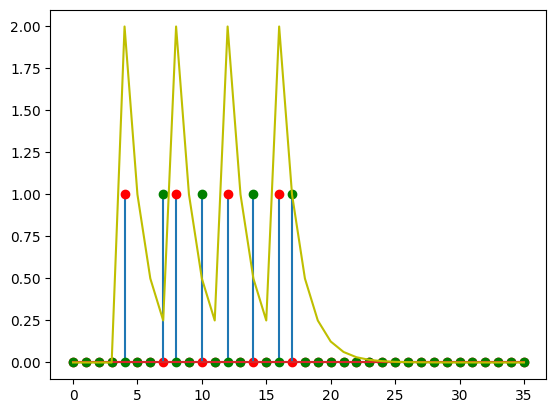

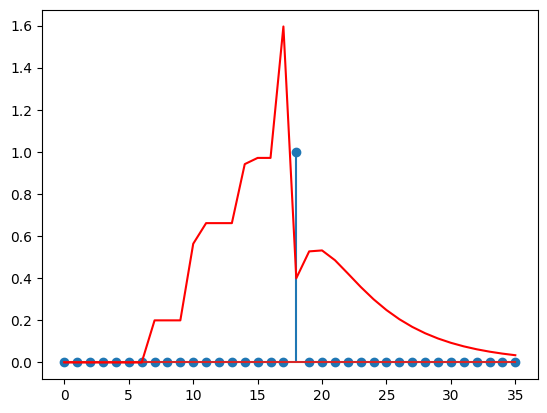

In [10]:
facs = [0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
trigs =[0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
spk_out = []
mem_rec = []
gain_rec = []

tde1 = TDE(decay_params=[2, 0.5, 200], leaky=False)

for step in range(np.size(facs)):

    tde1.calculate(facs[step], trigs[step])

    spk_out = np.append(spk_out, tde1.output)
    mem_rec = np.append(mem_rec, tde1.return_lif_mem())
    gain_rec = np.append(gain_rec, tde1.return_lif_gain())

# print(facs)
# print(trigs)
# print(spk_out)
# print(mem_rec)

plt.stem(range(np.size(facs)), facs, markerfmt='ro')
plt.stem(range(np.size(facs)), trigs, markerfmt='go')
plt.plot(range(np.size(facs)), gain_rec, color = "y")
plt.show()

plt.stem(range(np.size(facs)), spk_out)
plt.plot(range(np.size(facs)), mem_rec, color='r')
plt.show()